# Data Cleaning and EDA

The dataset was taken from this source:
    http://www.nlpr.ia.ac.cn/pal/trafficdata/recognition.html

The data was split into train and test folders. According to the source, there are 58 unique categories with varying counts for each category.

Imports and Configs

In [1]:
import pandas as pd
import numpy as np

from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

import os, pathlib


sns.set_theme()

The dataset wasn't split in directories to represent a class/category. Instead, the first three digits of the filenames indicates the class. The digits following the underscore represent a unique image for that particular traffic sign. E.g.:

    000_0001.png = Category 0, Image 1

Sometimes, the images are further subdivided to represent the same sign viewed from different angles. E.g.:

    000_1_0001 = Category 1, Image 1, Angle 1

To represent this, below is a list of the first 10 image names of the first image of each category/angle.

In [2]:
data_dir = pathlib.Path('data/tsrd-train')
signs = list(data_dir.glob('*_0001*'))
[f.name for f in signs[0:10]]

['000_0001.png',
 '000_1_0001.png',
 '001_0001.png',
 '001_1_0001.png',
 '002_0001.png',
 '002_1_0001.png',
 '003_0001.png',
 '003_1_0001.png',
 '004_0001.png',
 '004_1_0001.png']

The classes must first be clearly defined. To do this, pandas can be used to create a dataframe with a list of the image names in one colulmn and the labels in another.

In [3]:
# Labels
signs = [f.name for f in list(data_dir.glob('*'))] # Grab all file names
signs_classes = [f[0:3] for f in signs] # Grab first 3 numbers (class indicator)
signs_classes_unique = np.unique(signs_classes)
signs_classes_unique

array(['000', '001', '002', '003', '004', '005', '006', '007', '008',
       '009', '010', '011', '012', '013', '014', '015', '016', '017',
       '018', '019', '020', '021', '022', '023', '024', '025', '026',
       '027', '028', '029', '030', '031', '032', '033', '034', '035',
       '036', '037', '038', '039', '040', '041', '042', '043', '044',
       '045', '046', '047', '048', '049', '050', '051', '052', '053',
       '054', '055', '056', '057'], dtype='<U3')

In [4]:
# To replace dictionary for df.replace
to_replace = dict(zip(signs_classes_unique, signs_classes_unique.astype('int')))

In [5]:
df = {'File Names': signs, 'Labels': signs_classes}
df = pd.DataFrame(df)
df['Labels'] = df['Labels'].replace(to_replace=to_replace)
df['Labels'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4170 entries, 0 to 4169
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   File Names  4170 non-null   object
 1   Labels      4170 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 49.0+ KB


## Class Distribution

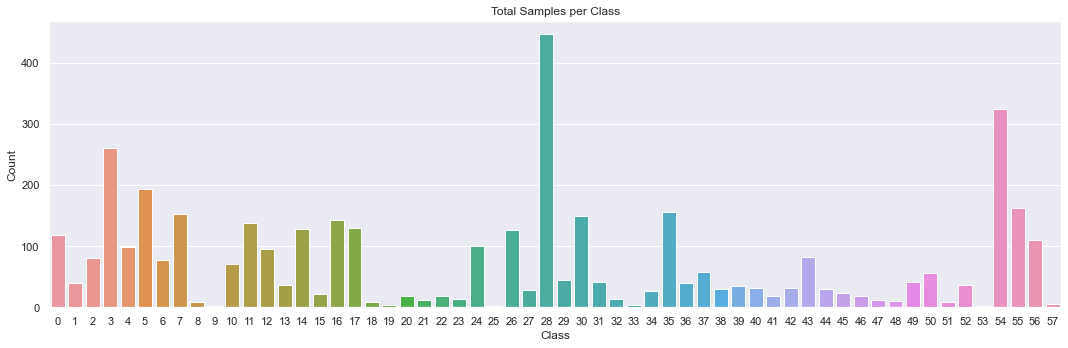

In [7]:
data = df['Labels'].value_counts().sort_index()
fig, ax = plt.subplots(1,1)
sns.barplot(x=data.index, y=data)
ax.set(
    ylabel='Count',
    xlabel='Class',
    title='Total Samples per Class'
)
fig.set(
    figheight=5,
    figwidth=15
)

fig.tight_layout()

## Top and Bottom 5 Images

In [8]:
data = df['Labels'].value_counts()
top5_idx = data[0:5].index
bottom5_idx = data[-5:len(data)].index

top5_fnames = []
bottom5_fnames = []
for cat in top5_idx:
    fname = df[df['Labels'] == cat].iloc[0, 0]
    top5_fnames.append(fname)

for cat in bottom5_idx:
    fname = df[df['Labels'] == cat].iloc[0, 0]
    bottom5_fnames.append(fname)

print(top5_fnames)
print(bottom5_fnames)

['028_0001.png', '054_0001.png', '003_0001.png', '005_0001.png', '055_0001.png']
['019_0001.png', '033_0001.png', '009_0001.png', '053_0001.png', '025_0001.png']


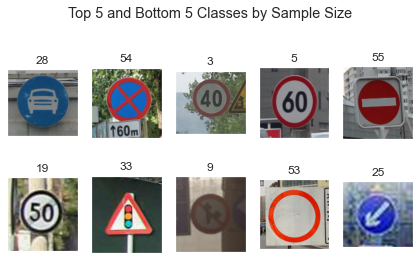

In [9]:
fig, ax = plt.subplots(2, 5)
ax = ax.ravel()

for idx, fname in enumerate(top5_fnames):
    img_dir = os.path.join(data_dir, fname)
    ax[idx].imshow(Image.open(img_dir))
    ax[idx].set(
        title=top5_idx[idx],
        xticks=[],
        yticks=[]
    )

for idx, fname in enumerate(bottom5_fnames):
    img_dir = os.path.join(data_dir, fname)
    ax[idx+5].imshow(Image.open(img_dir))
    ax[idx+5].set(
        title=bottom5_idx[idx-5],
        xticks=[],
        yticks=[]
    )

fig.suptitle('Top 5 and Bottom 5 Classes by Sample Size')
fig.tight_layout()

## Classes with sample size < 10

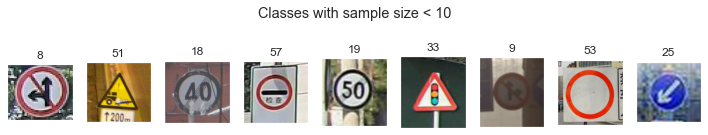

In [10]:
filter = df['Labels'].value_counts() < 10
data = df['Labels'].value_counts()[filter]

fig, ax = plt.subplots(1, len(data))
ax = ax.ravel()
for i, idx in enumerate(data.index):
    ax[i].imshow(Image.open(os.path.join(data_dir, df[df['Labels']==idx].iloc[0, 0])))
    ax[i].set(
        title=idx,
        xticks=[],
        yticks=[]
    )

fig.suptitle('Classes with sample size < 10', y=0.7)
fig.set(
    figheight=5,
    figwidth=10
)
fig.tight_layout()

## Viewing the provided testing dataset

Unique Classes

In [12]:
data_dir = pathlib.Path('data/tsrd-test')
signs = [f.name for f in list(data_dir.glob('*'))] # Grab all file names
signs_classes = [f[0:3] for f in signs] # Grab first 3 numbers (class indicator)
signs_classes_unique = np.unique(signs_classes)
signs_classes_unique

array(['000', '001', '002', '003', '004', '005', '006', '007', '008',
       '010', '011', '012', '013', '014', '015', '016', '017', '020',
       '021', '022', '023', '024', '025', '026', '027', '028', '029',
       '030', '031', '032', '034', '035', '036', '037', '038', '039',
       '040', '041', '042', '043', '044', '045', '046', '047', '048',
       '049', '050', '051', '052', '053', '054', '055', '056', '057'],
      dtype='<U3')

In [16]:
missing_classes = np.delete(list(range(58)), np.where(signs_classes_unique == list(range(58))))
missing_classes

<ipython-input-16-aff6345fdce0>:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  missing_classes = np.delete(list(range(58)), np.where(signs_classes_unique == list(range(58))))


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57])